In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tnrange
from scipy.sparse import csr_matrix
import scipy

In [2]:
mode = "CA1_clust12-20_spw"

#stim = np.load("/media/hdd01/sklee/"+mode+"/data/stim_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")
stim = np.load("/media/hdd01/sklee/"+mode+"/data/stim_T0.3_Ne2240_gA0.6_tauA1_gN0.8_Ni200_gG0.7_gB1.2_Er9_Ir30_balanced_rep1000_stimseed1.npy")

In [3]:
bad_idx = np.empty((19,500))
for k in range(19):
    bad_idx[k] = np.arange(2000*k+1500,2000*k+2000)
bad_idx = bad_idx.flatten().astype(int)

In [4]:
stim[:,2] -= 1

repeat = 1000
duration = 7900
E_no = 2240
I_no = 200

e_sparse_list = []
i_sparse_list = []

for i in tnrange(repeat):
    bins = np.arange(0,duration+0.1,0.2)
    
    part_e_neural = np.zeros((duration*5, E_no))
    part_i_neural = np.zeros((duration*5, I_no))
    
    stim_e = stim[np.where(stim[:,0] == i+1)[0]]
    stim_i = stim[np.where(stim[:,0] == -i-1)[0]]
    
    e_counts, _ = np.histogram(stim_e[:,2], bins)
    i_counts, _ = np.histogram(stim_i[:,2], bins)
    
    e_count = 0
    for j in range(e_counts.shape[0]):
        e_bin = e_counts[j]
        for k in range(e_bin):
            e_syn = int(stim_e[e_count,1])
            part_e_neural[j, e_syn] += 1
            e_count += 1
           
    i_count=0
    for j in range(i_counts.shape[0]):
        i_bin = i_counts[j]
        for k in range(i_bin):
            i_syn = int(stim_i[i_count,1])
            part_i_neural[j, i_syn] += 1
            i_count += 1
            
    part_e_neural = np.delete(part_e_neural, bad_idx, 0)
    part_i_neural = np.delete(part_i_neural, bad_idx, 0)
            
    sparse_part_e_neural = csr_matrix(part_e_neural)
    sparse_part_i_neural = csr_matrix(part_i_neural)
        
    e_sparse_list.append(sparse_part_e_neural)
    i_sparse_list.append(sparse_part_i_neural)
    
full_e = scipy.sparse.vstack(e_sparse_list)
full_i = scipy.sparse.vstack(i_sparse_list)


<ipython-input-4-05aea3f97e7f>:11: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(repeat):


  0%|          | 0/1000 [00:00<?, ?it/s]

In [5]:
scipy.sparse.save_npz("/media/hdd01/sklee/"+mode+"/data/Espikes_neural.npz", full_e)
scipy.sparse.save_npz("/media/hdd01/sklee/"+mode+"/data/Ispikes_neural.npz", full_i)

In [4]:
repeat = 1000
duration = 10000
E_no = 2000
I_no = 200

e_sparse_list = []
i_sparse_list = []

for i in tnrange(repeat):
    bins = np.arange(0,duration+0.1,0.2)
    
    part_e_neural = np.zeros((duration*5, E_no))
    part_i_neural = np.zeros((duration*5, I_no))
    
    stim_e = stim[np.where(stim[:,0] == i+1)[0]]
    stim_i = stim[np.where(stim[:,0] == -i-1)[0]]
    
    e_counts, _ = np.histogram(stim_e[:,2], bins)
    i_counts, _ = np.histogram(stim_i[:,2], bins)
    
    e_count = 0
    for j in range(e_counts.shape[0]):
        e_bin = e_counts[j]
        for k in range(e_bin):
            e_syn = int(stim_e[e_count,1])
            part_e_neural[j, e_syn] += 1
            e_count += 1
           
    i_count=0
    for j in range(i_counts.shape[0]):
        i_bin = i_counts[j]
        for k in range(i_bin):
            i_syn = int(stim_i[i_count,1])
            part_i_neural[j, i_syn] += 1
            i_count += 1
            
    sparse_part_e_neural = csr_matrix(part_e_neural)
    sparse_part_i_neural = csr_matrix(part_i_neural)
    
    #print(i, csr_matrix.sum(sparse_part_e_neural))
    
    e_sparse_list.append(sparse_part_e_neural)
    i_sparse_list.append(sparse_part_i_neural)
    
full_e = scipy.sparse.vstack(e_sparse_list)
full_i = scipy.sparse.vstack(i_sparse_list)


<ipython-input-4-610602a06f5b>:9: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(repeat):


  0%|          | 0/1000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [5]:
#scipy.sparse.save_npz("/media/hdd01/sklee/"+mode+"/data/Espikes_neural.npz", full_e)
#scipy.sparse.save_npz("/media/hdd01/sklee/"+mode+"/data/Ispikes_neural.npz", full_i)

In [2]:
mode = "CA1_rand"

e_locs = np.load("/media/hdd01/sklee/"+mode+"/data/Elocs_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.7_gB1.2_Er1_Ir7.5_random_NR_rep651_stimseed1.npy")
i_locs = np.load("/media/hdd01/sklee/"+mode+"/data/Ilocs_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.7_gB1.2_Er1_Ir7.5_random_NR_rep651_stimseed1.npy")

#syn_locs = np.load("/media/hdd01/sklee/CA1_clust25-20/data/synlocs_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep16_stimseed1.npy")
#e_locs = syn_locs[:2000]
#i_locs = syn_locs[2000:]

e_no = e_locs.shape[0]
i_no = i_locs.shape[0]

In [10]:
print(np.min(e_locs[:,0]))
print(np.max(e_locs[:,0]))
print(np.min(i_locs[:,0]))
print(np.max(i_locs[:,0]))


0.0
152.0
-1.0
152.0


In [11]:
C_syn_e = np.zeros((6,2000))
C_syn_i = np.zeros((6,200))

for i in range(2000):
    dend = e_locs[i,0]
    if dend <= 15:
        C_syn_e[1,i] = 1
    elif (dend >= 16) & (dend <= 46):
        C_syn_e[2,i] = 1
    elif (dend >= 47) & (dend <= 61):
        C_syn_e[3,i] = 1
    elif (dend >= 62) & (dend <= 74):
        C_syn_e[4,i] = 1
    elif dend >= 75:
        C_syn_e[5,i] = 1

for i in range(200):
    dend = i_locs[i,0]
        
    if dend < 0:
        C_syn_i[0,i] = 1
    elif (dend > 0) & (dend <= 15):
        C_syn_i[1,i] = 1
    elif (dend >= 16) & (dend <= 46):
        C_syn_i[2,i] = 1
    elif (dend >= 47) & (dend <= 61):
        C_syn_i[3,i] = 1
    elif (dend >= 62) & (dend <= 74):
        C_syn_i[4,i] = 1
    elif dend >= 75:
        C_syn_i[5,i] = 1
    

In [17]:
np.save("/media/hdd01/sklee/"+mode+"/data/handsub"+str(6)+"_C_syn_e.npy", C_syn_e)
np.save("/media/hdd01/sklee/"+mode+"/data/handsub"+str(6)+"_C_syn_i.npy", C_syn_i)

In [ ]:
sub_no = 11

if sub_no == 1:
    C_syn_e = np.ones((1,2000))
    C_syn_i = np.ones((1,200))
    C_den = np.ones((1,1))


elif sub_no == 6:
    C_syn_e = np.zeros((6,2000))
    C_syn_i = np.zeros((6,200))

    for i in range(2000):
        dend = e_locs[i,0]
        if dend <= 15:
            C_syn_e[1,i] = 1
        elif (dend >= 16) & (dend <= 46):
            C_syn_e[2,i] = 1
        elif (dend >= 47) & (dend <= 61):
            C_syn_e[3,i] = 1
        elif (dend >= 62) & (dend <= 74):
            C_syn_e[4,i] = 1
        elif dend >= 75:
            C_syn_e[5,i] = 1

    for i in range(200):
        dend = i_locs[i,0]
        
        if dend < 0:
            C_syn_i[0,i] = 1
        elif (dend > 0) & (dend <= 15):
            C_syn_i[1,i] = 1
        elif (dend >= 16) & (dend <= 46):
            C_syn_i[2,i] = 1
        elif (dend >= 47) & (dend <= 61):
            C_syn_i[3,i] = 1
        elif (dend >= 62) & (dend <= 74):
            C_syn_i[4,i] = 1
        elif dend >= 75:
            C_syn_i[5,i] = 1

    C_den = np.zeros((6,6))
    C_den[0,1:] = 1
    
elif sub_no == 11:
    C_syn_e = np.zeros((11,2000))
    C_syn_i = np.zeros((11,200))
    
    for i in range(2000):
        dend = e_locs[i,0]
        if dend <= 15:
            C_syn_e[1,i] = 1
        elif (dend >= 16) & (dend <= 46):
            C_syn_e[2,i] = 1
        elif (dend >= 47) & (dend <= 61):
            C_syn_e[3,i] = 1
        elif (dend >= 62) & (dend <= 74):
            C_syn_e[4,i] = 1
        elif (dend >= 75) & (dend <= 89):
            C_syn_e[5,i] = 1
        elif (dend >= 90) & (dend <= 103):
            C_syn_e[6,i] = 1
        elif (dend >= 104) & (dend <= 114):
            C_syn_e[7,i] = 1
        elif (dend >= 115) & (dend <= 127):
            C_syn_e[8,i] = 1
        elif (dend >= 128) & (dend <= 140):
            C_syn_e[9,i] = 1
        elif dend >= 141:
            C_syn_e[10,i] = 1
            
    for i in range(200):
        dend = i_locs[i,0]
        if dend < 0:
            C_syn_i[0,i] = 1
        elif (dend > 0) & (dend <= 15):
            C_syn_i[1,i] = 1
        elif (dend >= 16) & (dend <= 46):
            C_syn_i[2,i] = 1
        elif (dend >= 47) & (dend <= 61):
            C_syn_i[3,i] = 1
        elif (dend >= 62) & (dend <= 74):
            C_syn_i[4,i] = 1
        elif (dend >= 75) & (dend <= 89):
            C_syn_i[5,i] = 1
        elif (dend >= 90) & (dend <= 103):
            C_syn_i[6,i] = 1
        elif (dend >= 104) & (dend <= 114):
            C_syn_i[7,i] = 1
        elif (dend >= 115) & (dend <= 127):
            C_syn_i[8,i] = 1
        elif (dend >= 128) & (dend <= 140):
            C_syn_i[9,i] = 1
        elif dend >= 141:
            C_syn_i[10,i] = 1
    
    C_den = np.zeros((11,11))
    C_den[0,1:6] = 1
    C_den[5,6:] = 1
    
print(np.var(np.sum(C_syn_e, 0)))
print(np.var(np.sum(C_syn_i, 0)))
print(np.sum(C_syn_e))
print(np.sum(C_syn_i))
print(C_den)

In [ ]:
np.save("/media/hdd01/sklee/"+mode+"/data/handsub"+str(sub_no)+"_C_syn_e.npy", C_syn_e)
np.save("/media/hdd01/sklee/"+mode+"/data/handsub"+str(sub_no)+"_C_syn_i.npy", C_syn_i)
np.save("/media/hdd01/sklee/"+mode+"/data/handsub"+str(sub_no)+"_C_den.npy", C_den)

In [ ]:
mode = "CA1_clust4-60"

v = np.load("/media/hdd01/sklee/CA1_clust4-60/data/V_diff.npy")
dv = np.diff(v)

high_dv = np.zeros((dv.shape[0]-1))

for i in tnrange(dv.shape[0] - 1):
    if dv[i] >= 0.04:
        neg_count = 0
        for j in range(10):
            if dv[i+j] <= -0.015:
                neg_count += 1
        if neg_count > 0:
            high_dv[i] += 1
        
print(np.where(high_dv == 1)[0].size)

high_dv_diff = np.diff(high_dv)
unique_high_dv = np.zeros((high_dv_diff.shape[0]))
for i in range(high_dv_diff.shape[0]):
    if high_dv_diff[i] == 1:
        unique_high_dv[i-3] += 1
print(np.sum(unique_high_dv))

In [ ]:
np.save("/media/hdd01/sklee/"+mode+"/data/spk_loc.npy", unique_high_dv)

In [13]:
np.save("/media/hdd01/sklee/CA1_rand/data/V_diff.npy", diff)

In [53]:
V = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[:,:50000].flatten()
dV = np.diff(V)
diff = np.load("/media/hdd01/sklee/CA1_clust4-60/data/V_diff.npy")
resid = np.load("/media/hdd01/sklee/CA1_clust4-60/V_resid_gru_blind_whole_h40.npy")
resid_thresh = np.copy(resid)

resid_thresh[resid_thresh < 0.2] = 0

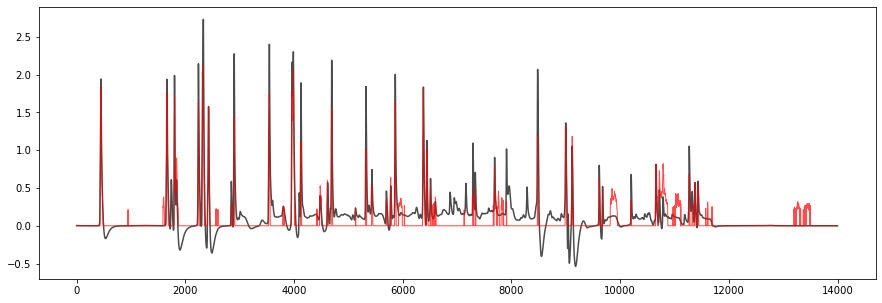

In [57]:
plt.figure(figsize = (15,5))
rep = 0
plt.plot(diff[rep*50000:(rep+1)*50000][16000:30000], c="black", alpha=0.7)
plt.plot(resid_thresh[rep*50000:(rep+1)*50000][16000:30000], linewidth=1, c="red", alpha=0.7)

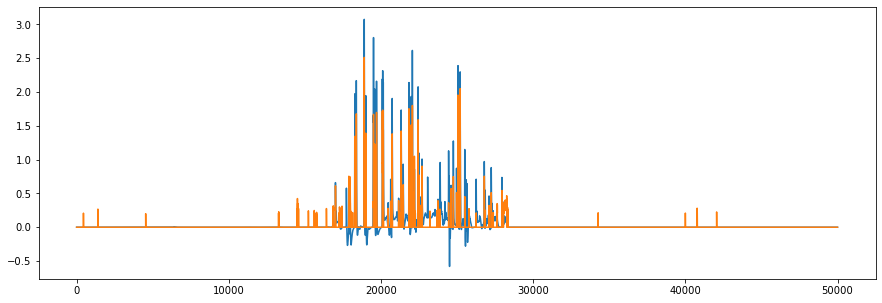

In [56]:
plt.figure(figsize = (15,5))
plt.plot(diff[50000:100000])
plt.plot(resid_thresh[50000:100000])


(-0.2, 0.5)

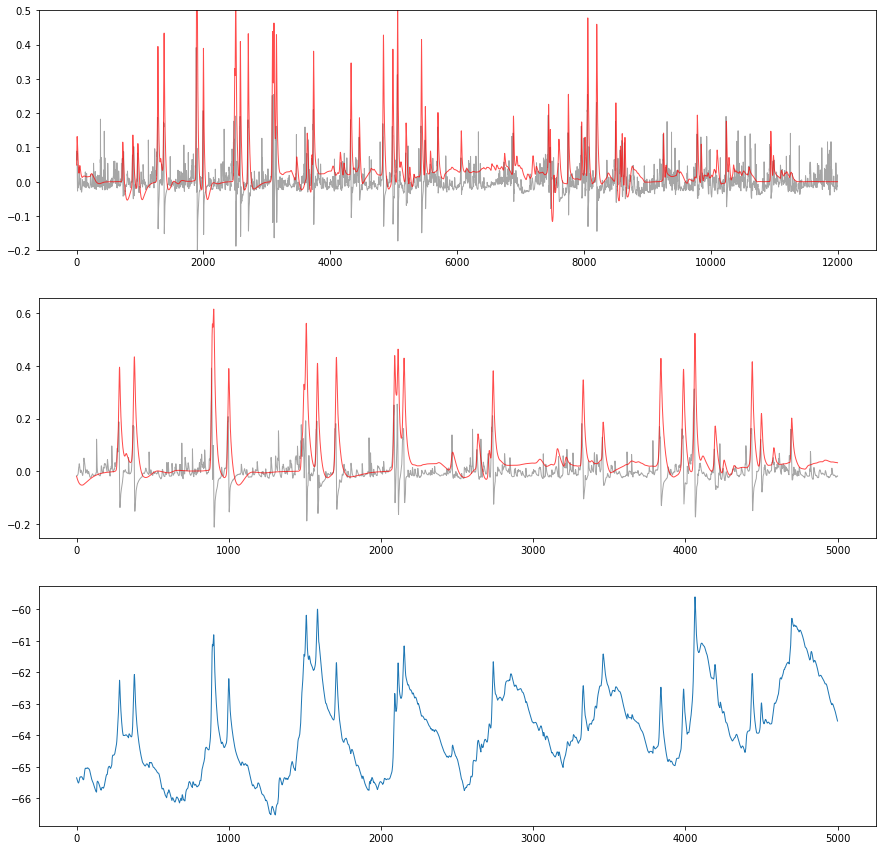

In [46]:
fig, axs= plt.subplots(nrows=3, figsize = (15,15))

rep = 1

axs[0].plot(dV[rep*50000:(rep+1)*50000][17000:29000], linewidth=1, color="gray", alpha=0.7)
axs[0].plot(diff[rep*50000:(rep+1)*50000][17000:29000] / 5, linewidth=1, color="red", alpha=0.7)

axs[2].plot(V[rep*50000:(rep+1)*50000][18000:23000], linewidth=1)

axs[1].plot(dV[rep*50000:(rep+1)*50000][18000:23000], linewidth=1, color="gray", alpha=0.7)
axs[1].plot(diff[rep*50000:(rep+1)*50000][18000:23000] / 5, linewidth=1, color="red", alpha=0.7)


axs[0].set_ylim(-0.2,0.5)

In [2]:
yes = np.load("/media/hdd01/sklee/CA1_1.5clust12-20/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")
no = np.load("/media/hdd01/sklee/CA1_1.5clust12-20_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")
diff = yes[:,:50000].flatten() - no[:,:50000].flatten()
print(diff.shape)

(50000000,)


In [3]:
#np.save("/media/hdd01/sklee/CA1_1.5clust12-20/data/V_diff_stimseed1.npy", diff)

In [4]:
clust_setting = "CA1_clust12-20"
clust_no = 12
sub_no = clust_no + 6

eloc = np.load("/media/hdd01/sklee/"+clust_setting+"/data/Elocs_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")
iloc = np.load("/media/hdd01/sklee/"+clust_setting+"/data/Ilocs_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")

In [5]:
clust_dend = np.unique(eloc[880:1120,0])

C_syn_e = np.zeros((sub_no, eloc.shape[0]))
C_syn_i = np.zeros((sub_no, iloc.shape[0]))

for e in tnrange(eloc.shape[0]):
    dend = eloc[e,0]
    if np.isin(dend, clust_dend) == True:
        clust_pos = np.where(clust_dend == dend)[0]
        C_syn_e[clust_pos + 6,e] += 1
    else:
        if dend <= 15:
            C_syn_e[1,e] = 1
        elif (dend >= 16) & (dend <= 46):
            C_syn_e[2,e] = 1
        elif (dend >= 47) & (dend <= 61):
            C_syn_e[3,e] = 1
        elif (dend >= 62) & (dend <= 74):
            C_syn_e[4,e] = 1
        elif dend >= 75:
            C_syn_e[5,e] = 1
            
            
for i in tnrange(iloc.shape[0]):
    dend = iloc[i,0]
    if np.isin(dend, clust_dend) == True:
        clust_pos = np.where(clust_dend == dend)[0]
        C_syn_i[clust_pos + 6,i] += 1
    else:
        if dend < 0:
            C_syn_i[0,i] = 1
        elif (dend > 0) & (dend <= 15):
            C_syn_i[1,i] = 1
        elif (dend >= 16) & (dend <= 46):
            C_syn_i[2,i] = 1
        elif (dend >= 47) & (dend <= 61):
            C_syn_i[3,i] = 1
        elif (dend >= 62) & (dend <= 74):
            C_syn_i[4,i] = 1
        elif dend >= 75:
            C_syn_i[5,i] = 1
            
print(C_syn_e.shape)

<ipython-input-5-a28300598656>:6: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for e in tnrange(eloc.shape[0]):


  0%|          | 0/2000 [00:00<?, ?it/s]

<ipython-input-5-a28300598656>:24: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(iloc.shape[0]):


  0%|          | 0/200 [00:00<?, ?it/s]

(18, 2000)


In [5]:
#np.save("/media/hdd01/sklee/"+clust_setting+"/data/handsub"+str(sub_no)+"_C_syn_e.npy", C_syn_e)
#np.save("/media/hdd01/sklee/"+clust_setting+"/data/handsub"+str(sub_no)+"_C_syn_i.npy", C_syn_i)

In [6]:
clust_setting = "CA1_2clust12-20"
nona_setting = "CA1_2clust12-20_noNA"

yes = np.load("/media/hdd01/sklee/"+clust_setting+"/data/vdata_T0.3_Ne2240_gA0.6_tauA1_gN0.8_Ni200_gG0.7_gB1.2_Er9_Ir30_balanced_rep1000_stimseed1.npy").reshape(-1,20,1501)
no = np.load("/media/hdd01/sklee/"+nona_setting+"/data/vdata_T0.3_Ne2240_gA0.6_tauA1_gN0.8_Ni200_gG0.7_gB1.2_noDendNa_Er9_Ir30_balanced_rep1000_stimseed1.npy").reshape(-1,20,1501)
diff = yes[:,:,:1500].flatten() - no[:,:,:1500].flatten()
print(yes.shape)
print(diff.shape)

(1000, 20, 1501)
(30000000,)


In [7]:
#np.save("/media/hdd01/sklee/"+clust_setting+"/data/V_diff_stimseed1.npy", diff)

In [4]:
sub_no = 12 + 6
E_no = 2000
I_no = 200

C_syn_e = np.zeros((sub_no, E_no))
C_syn_i = np.zeros((sub_no, I_no))

for e in range(E_no):
    idx = np.random.randint(0, sub_no)
    C_syn_e[idx, e] = 1
    
for i in range(I_no):
    idx = np.random.randint(0, sub_no)
    C_syn_i[idx,i] = 1

In [5]:
np.save("/media/hdd01/sklee/CA1_clust12-20/data/randsub18_C_syn_e.npy", C_syn_e)
np.save("/media/hdd01/sklee/CA1_clust12-20/data/randsub18_C_syn_i.npy", C_syn_i)